In [52]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer



### 1. Utiliza el siguiente enlace para descargar el Diabetes Dataset, junto con su fichero de nombres. Utiliza un Jupyter Notebook y el paquete Pandas para abrir el archivo y presentarlo en formato DataFrame, donde el nombre de las columnas debe corresponder con el nombre real de las variables

In [53]:
df = pd.read_csv('../data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### a. hacemos un info para ver el tipo de variables


todas las variables son númericas

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [55]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


¿Cuántos valores faltantes tiene cada variable?

In [56]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [57]:
columnas = df.columns
columnas_remplazar= []
for c in columnas:
    cuantas = df[df[c] == 0][c].count()
    if cuantas > 0 and c != 'Outcome':

        columnas_remplazar.append(c)
        print(f"Esta columna {c} tiene {cuantas} filas a 0")

Esta columna Pregnancies tiene 111 filas a 0
Esta columna Glucose tiene 5 filas a 0
Esta columna BloodPressure tiene 35 filas a 0
Esta columna SkinThickness tiene 227 filas a 0
Esta columna Insulin tiene 374 filas a 0
Esta columna BMI tiene 11 filas a 0


Explica el nombre y el significado de las variables que aparecen en el dataset. 

Pregnancies (Embarazo): Esta variable nos dice cuantos embarazos a tenido una mujer. 

Glucose (Glucosa): Estos son los valores de azucar que tiene una persona.

BloodPressure (Presión arterial): medidas de la presión arterial de una persona.

SkinThickness (Grosor de la piel):
                
Insulin (Insulina): Niveles de insulina en una persona.

BMI(Imc): Indice de masa corporal de una persona.
DiabetesPedigreeFunction (Diabetes Pedigrí Función): Función que asigna la probabilidad de padecer diabetes a partir de la historia familiar.

Age (Edad ): años de las personas                   
Outcome (Resultado): si tiene o no tiene diabetes. 

In [58]:
columnas = df.columns
columnas_remplazar= []
for c in columnas:
    cuantas = df[df[c] == 0][c].count()
    if cuantas > 0 and c != 'Outcome':

        columnas_remplazar.append(c)
        print(f"Esta columna {c} tiene {cuantas} filas a 0")

Esta columna Pregnancies tiene 111 filas a 0
Esta columna Glucose tiene 5 filas a 0
Esta columna BloodPressure tiene 35 filas a 0
Esta columna SkinThickness tiene 227 filas a 0
Esta columna Insulin tiene 374 filas a 0
Esta columna BMI tiene 11 filas a 0


¿Tiene sentido que alguien tenga un índice de masa corporal o una presión sanguínea igual a cero?

No tiene sentido , ya que estas variables siempre tienen que tener un rango pero nunca 0.

En las variables que corresponda, sustituye los valores que no tengan sentido por valores np.nan

In [59]:
columnas_remplazar

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [60]:
df_nan = df.copy()
df_nan[columnas_remplazar] = df[columnas_remplazar].replace(0,np.nan)
df_nan

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


Vuelve a utilizar el método info() de Pandas. ¿Cuántos valores faltantes aprecias ahora

In [61]:
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               657 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [62]:
df_nan.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### b. Usando el DataFrame en el que los valores faltantes han sido marcados como np nan, dibuja en una misma gráfica dos histogramas, ambos con nivel de transparencia (alpha) igual a 0.7, y de forma que ambos sean de colores distintos. Uno de los histogramas corresponderá al histograma de la variable“DiabetesPedrigreeFunction” de las instancias en las que “Insulin”tiene un valor numérico. El otro histograma corresponderá al histograma de la variable “DiabetesPedrigreeFunction” de las instancias en las que el valor


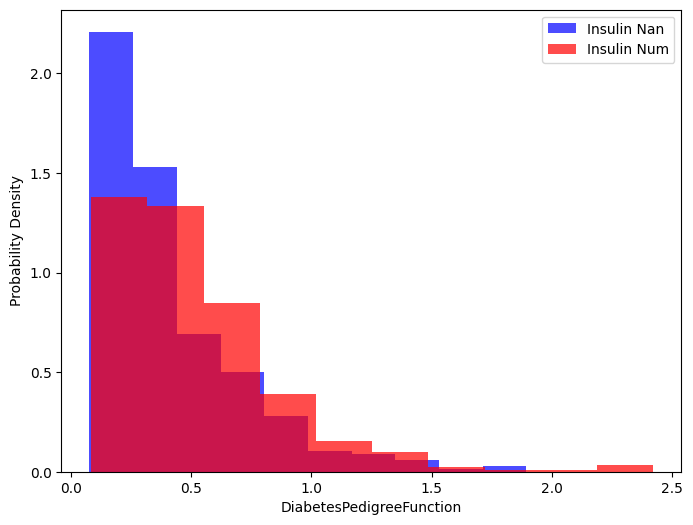

In [63]:
df_insulin_num= df_nan[df_nan['Insulin'].notna()]
df_insulin_nan = df_nan[df_nan['Insulin'].isna()]
plt.figure(figsize=(8,6))
plt.hist(df_insulin_nan['DiabetesPedigreeFunction'],density=True,bins=10,alpha= 0.7,color= 'blue',label= 'Insulin Nan')
plt.hist(df_insulin_num['DiabetesPedigreeFunction'],density=True,bins=10,alpha= 0.7, color='red',label='Insulin Num')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


¿Ambos histogramas son iguales?

Los histogramas no son iguales, porque el area de los datos de insulin_nun es más grande que el area de insulin_nan.

¿Podemos pensar que los valores de “Insulin” son faltantes con independencia de cuál sea el valor de “DiabetesPedrigreeFunction”?

   no son faltantes por la independencia de DiabetesPedrigreeFunction , son faltantes porque los datos estan mal recopilados o obtenidos. Para  dar positivo en diabetes, la DiabetesPedrigreeFunction que es la función que asigna la probabilidad de padecer diabetes a partir de la historia familiar y el sobrepeso son factores que tienen relación con la producción de insulina.

### C. declara un objeto de la clase SimpleImputer de Scikit Learn en el que el argumento “strategy” sea igual a “constant”. Declara un objeto de la clase RandomForestClassifier de Scikit Learn con los valores por defecto. Declara un objeto de la clase Pipeline deScikit Learn en el que en la variable “steps” se utilice primero el objeto deSimpleImputer y después el objeto de RandomForestClassifier. Declara un objeto de la clase StratifiedKFold en el que la variable ‘n_splits’ sea igual a 10 y la variable “random_state” sea igual a 42. Utiliza el método “cross_val_score” de Scikit Learn para obtener 10 valores de la métrica del clasificador aplicado a este conjunto de datos. En los argumentos del método debemos utilizar el objeto de la clase Pipeline que hemos definido anteriormente, un DataFrame X donde se han tenido en cuenta solo lasvariables predictoras y un array de numpy Y en el que aparezcan los valores de la target. El argumento “scoring” debe ser igual a “accuracy", y el argumento ‘cv’ debe ser igual al objeto de la clase “StratifiedKFold” que hemos declarado antes. Guarda los valores de las métricas obtenidas en un array llamado accuracy_constant.


In [64]:
x_columns = ['Pregnancies','Glucose', 'BloodPressure','SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
y_columns = 'Outcome'
X = df_nan[x_columns]
y = df_nan[y_columns]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [65]:
pipe_imputer_forest = Pipeline(steps=[('scaler',SimpleImputer(strategy='constant')),
                     ('reg', RandomForestClassifier())])
rdfk = RepeatedStratifiedKFold(n_splits=10, random_state=42)
accuracy_constant = cross_val_score(pipe_imputer_forest, X_train, y_train, cv=rdfk, scoring='accuracy')


### D. En este apartado vamos a imputar todos los valores faltantes del dataset utilizando el valor de la media de la variable en el conjunto de entrenamiento Repite los pasos del apartado anterior pero de forma que el argumento “strategy” del objeto de la clase SimpleImputer sea igual a“mean”. Guarda los valores de las métricas obtenidas en un array llamado accuracy_mean

In [66]:
imputer_forest = Pipeline(steps=[('score', SimpleImputer(strategy='mean')),
                                 ('reg',RandomForestClassifier())])
rdfk = RepeatedStratifiedKFold(n_splits=10, random_state=42 )
accuracy_mean = cross_val_score(imputer_forest, X_train, y_train, cv=rdfk, scoring='accuracy')

###  e. En este apartado vamos a imputar todos los valores faltantes del dataset utilizando el valor más frecuente de la variable en el conjunto de entrenamiento. Repite los pasos del apartado anterior pero de forma que el argumento “strategy” del objeto de la clase SimpleImputer sea igual a“most_frequent”. Guarda los valores de las métricas obtenidas en un array llamado accuracy_most_frequent

In [67]:
imputer_forest = Pipeline(steps=[('score', SimpleImputer(strategy='most_frequent')),
                                 ('reg',RandomForestClassifier())])
rdfk = RepeatedStratifiedKFold(n_splits=10, random_state=42 )
accuracy_most_frequent = cross_val_score(imputer_forest, X_train, y_train, cv=rdfk, scoring='accuracy')

### f. Repite los pasos del apartado anterior pero de forma que en vez de declarar un objeto de la clase SimpleImputer, declares un objeto de laclase KNNImputer de Scikit Learn. Donde el valor de la variable“n_neighbors” sea igual a 5. Declara el objeto de la clase Pipeline de forma que en la variable “steps” se utilice primero el objeto de KNNImputer y después el objeto de RandomForestClassifier. Declara el objeto de la clase StratifiedKFold y utiliza el método “cross_val_score” de la misma forma que anteriormente. Guarda los valores de las métricas obtenidas en un array llamado accuracy_knn_k5

In [68]:
imputer_forest = Pipeline(steps=[('score', KNNImputer(n_neighbors=5)),
                                 ('reg',RandomForestClassifier())])
rdfk = RepeatedStratifiedKFold(n_splits=10, random_state=42 )
accuracy_knn_k5 = cross_val_score(imputer_forest, X_train, y_train, cv=rdfk, scoring='accuracy')

### g. Representa en un gráfico de violín los valores de los arrays accuracy_constant, accuracy_mean, accuracy_most_frequent y accuracy_knn_k5. ¿Qué método de imputación parece más apropiado para este conjunto de datos basándonos en los valores de la accuracy obtenidos para el dataset de test

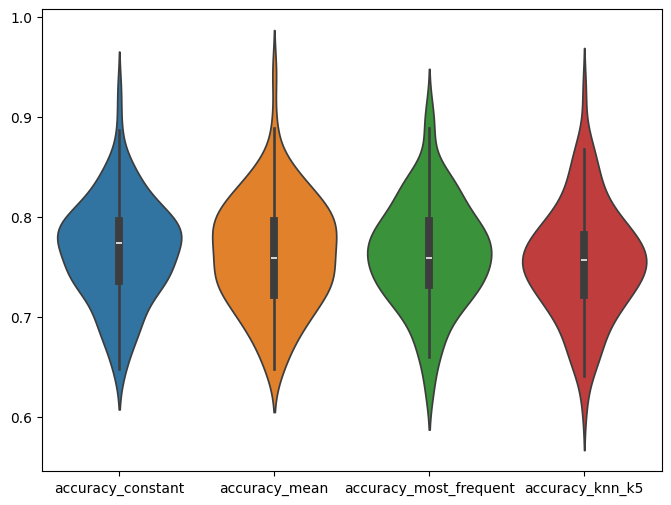

In [69]:
plt.figure(figsize=(8,6))
grupo ={
    'accuracy_constant': accuracy_constant,
    'accuracy_mean': accuracy_mean,
    'accuracy_most_frequent': accuracy_most_frequent,
    'accuracy_knn_k5': accuracy_knn_k5
    }
sn.violinplot(data=grupo)
plt.show()

### h. Busca información sobre el fenómeno de data leakage. Haz un pequeño resumen de un párrafo de la información que hayas obtenido,especificando de dónde la has obtenido, y pon un ejemplo de caso de uso en el que se produzca data leakage por no separar convenientemente los conjuntos de entrenamiento y test.



Data Leakage : Es la fuga de datos, esto ocurre cuando la información externa al conjunto de entrenamiento se utiliza para crear el modelo. Esto sucede cuando se aplican tecnicas de preprosesamiento antes de dividir el conjunto de datos primero tenemos que dividir los datos en conjuntos de entrenamiento y prueba. El problema sucede cuando el conjunto de prueba se ve influenciado por conjunto de datos completos en el preprocesamiento, de esta manera los datos pueden arrojarnos falsas metricas de rendimiento del modelo. 
Al trabajar con aprendizaje automático es crucial evitar la fuga de datos y, al mismo tiempo, establecer un modelo base para realizar comparaciones significativas.


https://medium.com/@gdellamattia/data-leakage-impacto-en-los-gadgets-c2fd136c273c